# Model structuur
*Auteurs: R.A. Collenteur*

Een belangrijke stap in tijdreeksanalyse is het bepalen van de modelstructuur. Dit is het onderwerp van dit hoofdstuk. We beperken ons hier tot het bepalen van het deterministische deel van het model, het bepalen van het ruismodel is onderdeel van een ander hoofdstuk. Voor het bepalen van de gewenste modelstructuur is het belangrijk om vast te stellen wat het doel van het tijdreeksmodel is. In dit hoofdstuk wordt een overzicht gegeven van de verschillende opties die mogelijk zijn bij het bepalen van de modelstructuur.  

## Inhoudsopgave

- [Response functies](#Respons-functies)
- [Effect van neerslag en verdamping](#Effect-van-neerslag-en-verdamping)
- [Respons functies](#Respons-functies)
- [Drempel niet-lineariteit](#Drempel-niet-lineariteit)
- [Veranderende systemen](#Systeem-veranderingen)
- [Welke invloeden moeten worden meegenomen](#Bepalen-invloeden)
- [Referenties](#Referenties)

## Overwegingen

- Aantal parameters
- Doel van modellering
- Residuen analyse voor missende variabelen
- 


## Algemeen loopschema

1. Systeem analyse: bepaal mogelijke hydrologische variabelen,
2. Model bouw: Bepaal hoe deze variabelen om te zetten in fluctuaties,
3. Controle: bepaal welke variabelen daadwerkelijk invloed hebben.

We gaan ervan uit dat de eerste stap al is uitgevoerd en bespreken de tweede en derde stap. Eerst wordt een overzicht gegeven van de bouwstenen die beschikbaar zijn om een model te bouwen. Daarna kijken we naar methoden om te bepalen welke bouwstenen nodig zijn in een model.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pastas as ps

ps.set_log_level("ERROR")
ps.show_versions()

Python version: 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:37:09) 
[Clang 10.0.1 ]
Numpy version: 1.18.5
Scipy version: 1.4.0
Pandas version: 1.1.2
Pastas version: 0.16.0b
Matplotlib version: 3.1.3


## Effect van neerslag en verdamping

Vrijwel alle grondwaterstanden in Nederland worden in meer of mindere mate beinvloed door neerslag en (potentiele) verdamping. Deze twee verklarende tijdsreeksen worden daarom bijna altijd in een tijdreeksmodel opgenomen. De manier waarop deze tijdreeksen worden meegenomen in het model kunnen sterk verschillen. We kunnen grofweg drie methoden onderscheiden: 

- Neerslag en verdamping met aparte respons functies
- Netto neerslagoverschot (N = P-fE) en 1 respons functie 
- Niet-lineaire grondwateraanvulling en 1 respons functie

Bij de eerste methode worden de twee tijdreeksen onafhankelijk van elkaar meegenomen en geconvolueerd met een response functie. Bij de tweede methode wordt eerst een netto neerslagoverschot berekend en wordt 1 respons functie gebruikt. Het voordeel van de tweede optie is een geringer aantal parameters door het gebruik van een enkele respons functie. Dit model wordt bijvoorbeeld gebruikt voor de modellen op grondwatertools.nl voor heel Nederland.

Bij de derde methode wordt een niet-lineair model gebruikt om grondwateraanvulling te berekenen, die vervolgens ook geconvolueerd wordt met een respons functie. Verschillende niet-lineaire modellen zijn beschikbaar, zie bijvoorbeeld Berendrecht et al. (2005), Peterson en Western (2014) en Collenteur et al. (2020). Een voordeel van niet-lineaire modellen is dat er rekening wordt gehouden met processen in de onverzadigde zone, waardoor de grondwaterstand niet meer lineair reageert op neerslag en verdamping. Dit gebeurt bijvoorbeeld wanneer de verdamping wordt beperkt door de de beschikbare bodemvocht ten tijd van droogte, of door de berging van neerslag in de onverzadigde zone. 

Mogelijke nadelen van niet-lineaire modellen kunnen een groter aantal vrije parameters zijn of de rekentijd van het model. Het is echter vaak mogelijk een aantal parameters vast te zetten en een response functie te gebruiken met minder parameters, waardoor het aantal vrije parameters sterk is te reduceren. Door recente ontwikkelingen in de software is de rekentijd eigenlijk geen argument meer om niet-lineaire modellen niet te gebruiken.

### Neerslag en verdamping als aparte invloeden

In [2]:
# Voorbeeld van neerslag en verdamping met aparte respons functies

### Lineaire neerslagoverschot

In [3]:
# Voorbeeld van netto neerslagoverschot (N = P-fE) en gamma respons functie

### Niet-lineaire grondwateraanvulling

In [4]:
# Voorbeeld van Niet-lineaire grondwateraanvulling en exponentiele response functie

## Respons functies

Er zijn tal van respons functies die kunnen worden gekozen om een verklarende tijdreeks om te zetten in een bijdrage aan de grondwaterstandsfluctuaties. De keuze voor een bepaalde respons functie kan bijvoorbeeld afhangen van het type verklarende reeks (bv. neerslag of een rivier), maar ook van het systeem (dikke of dunne overzadigde zone). Voor het effect van neerslag en verdamping wordt vaak een vorm van de 4 parameter gamma functie gebruikt. Afhankelijk van het systeem kunnen bepaalde parameters worden vastgezet, wat het aantal te schatten parameters verlaagt. Het dient over het algemeen aanbeveling verschillende response functie te testen. 


- een niet-lineair grondwateraanvulling model simuleert ook vertraging, vaak kan dan een Exponentiele functie ipv een Gamma worden gebruikt.
- Als $n=±1$, dan kan de Exponentiele functie worden gebruikt ipv Gamma.
- Bij een dikke onverzadigde zone kan een 4-parameter Gamma functie worden gebruikt.


In [5]:
# Voorbeeld van Gamma response functie waar n=1, en hetzelfde model met een exponentiele functie

In [6]:
# Voorbeeld van Hantush response functie?

## Drempel niet-lineariteit
Een veelvoorkomend fenomeen in Nederland is drempel niet-lineariteit. Daarbij reageert een grondwatersysteem anders op een impuls (bv. neerslag) nadat een bepaalde grenswaarde in de grondwaterstand is overschreden. Knotter et al. () hebben hiervoor een model ontwikkelt, waarbij de respons op neerslagoverschot afhangt van de grondwaterstand boven of onder een bepaalde drempelwaarde. 

Of er sprake is van drempel niet-lineariteit kan worden vastgesteld door:

1. visuele inspectie, 
2. testen van verschillende modelstructuren, of 
3. het plotten van een histogram van de grondwaterstandsmetingen (? idee Raoul).


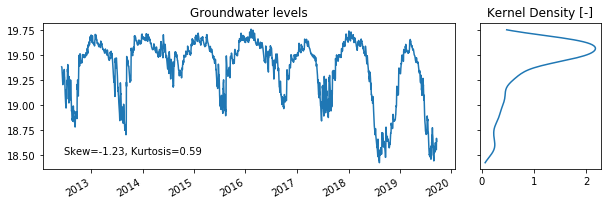

In [141]:
# Plot van tijdreeks waarbij sprake is van drempel niet lineariteit, inclusief histogram aan de zijkant 90 graden gedraaid.
from scipy.stats import gaussian_kde
from matplotlib.gridspec import GridSpec

ml = ps.io.load('data/B28H1804_2.pas')

fig = plt.figure(figsize=(10,3))

gs = GridSpec(1, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, :-1])
ax2 = fig.add_subplot(gs[0, -1], sharey=ax1)

head = ml.oseries.series
head.plot(ax=ax1)

kernel = gaussian_kde(head)
plt.plot(kernel(np.arange(head.min(),head.max(), 0.01)), np.arange(head.min(),head.max(), 0.01))

ax1.set_title("Groundwater levels")
ax2.set_title("Kernel Density [-]");
plt.text(0.05, 0.1, "Skew={}, Kurtosis={}".format(head.skew().round(2), head.kurtosis().round(2)), transform=ax1.transAxes);

Uit bovenstaande plots is af te lezen dat er mogelijk sprake is van drempel niet-lineariteit. We maken daarom twee modellen: de eerste met een simpel neerslag overschot en een tweede met drempel niet-lineariteit (Knotters et al., 1999).

NB. Je moet denk ik ook iets met kurtosis of skew kunnen...

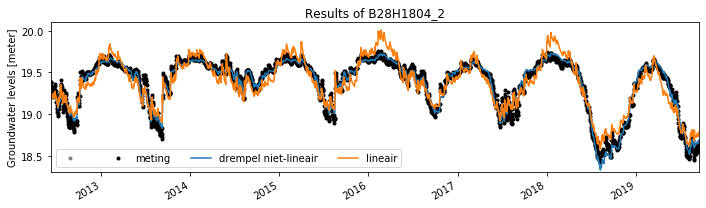

In [142]:
# the model is already solved, but we solve it again to be certain
ml.solve(noise=False, report=False)
sim = ml.simulate()

# Plot van lineair model versus een drempel niet-lineair model.
sm = ml.stressmodels['recharge']
prec = sm.stress[0]
evap = sm.stress[1]

# delete all the stressmodels, the constant and the transform
ml.del_stressmodel('recharge')
ml.del_constant()

# then add a TarsoModel
sm = ps.TarsoModel(prec, evap, ml.oseries)
ml.add_stressmodel(sm)

# and solve and plot the results again
ml.solve(noise=False, report=False)
ax = ml.plot(figsize=(10,3));
ax.plot(sim)
ax.set_ylim(18.3, 20.1)
ax.legend(["", "meting", "drempel niet-lineair", "lineair"], ncol=4)

## Systeem 
Systemen kunnen niet allen veranderen als gevolg van de grondwaterstand (bv. drempel niet-lineariteit), maar ook als gevolg van systeemsveranderingen door de tijd.
- Stap response
- Lineaire trend
- Veranderende respons functies (Obergfjell et al. (2019)).

### Stap response



INFO: Cannot determine frequency of series stand_m_tov_nap
INFO: Inferred frequency from time series RD: freq=D 
INFO: Inferred frequency from time series EV24: freq=D 


Fit report stand_m_tov_na               Fit Statistics
nfev     30                     EVP                 84.99
nobs     2873                   R2                   0.85
noise    True                   RMSE                 0.23
tmin     2006-06-20 00:00:00    AIC                  3.94
tmax     2018-12-04 00:00:00    BIC                 45.68
freq     D                      Obj                  0.79
warmup   3650 days 00:00:00     ___                      
solver   LeastSquares           Interpolated         None

Parameters (6 were optimized)
                   optimal   stderr        initial   vary
recharge_A        0.695406  ±31.74%       0.196773   True
recharge_a      281.856451  ±31.32%      10.000000   True
recharge_f       -2.000000   ±8.27%      -1.000000   True
step_d           -0.395148  ±36.33%      -1.000000   True
step_tstart  734685.000000    ±nan%  734685.000000  False
constant_d       17.225488   ±1.67%      16.232092   True
noise_alpha     202.458099  ±40.39%       1.

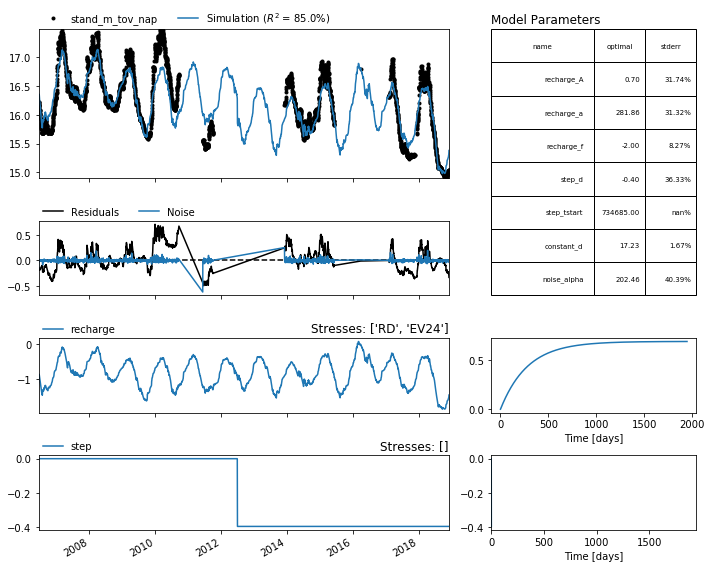

In [30]:
# Voorbeeld van model met stap respons
p = pd.read_csv("data/RD Helmond.csv", index_col=0, parse_dates=True, squeeze=True) * 1e3
e = pd.read_csv("data/EV24 Eindhoven.csv", index_col=0, parse_dates=True, squeeze=True) * 1e3
h = pd.read_csv("data/B51G2150-001.csv", index_col=0, parse_dates=True, squeeze=True)

# Maak een model
ml = ps.Model(h)

# Voeg stress modellen toe
sm = ps.RechargeModel(p, e, name="recharge", rfunc=ps.Exponential, recharge=ps.rch.Linear())
step = ps.StepModel(tstart=pd.Timestamp("2012-07-01"), name="step", up=False)
ml.add_stressmodel([sm, step])

# Kalibreer het model en toon de resultaten
ml.solve()
ml.plots.results();

In [11]:
# Voorbeeld van model met lineaire trend

## Verklarende variabelen
Welke verklarende variabelen moeten worden meegenomen 

- Toetsen van hydrologische plausibiliteit van evenwichtsrelatie (bv. well_A > 0), diagnostisch toetsen noodzakelijk
- Lengte van de respons functie
- Residuen analyse

In [12]:
# Voorbeeld van model met pompput en zonder, significante well_A en niet

In [13]:
# Voorbeeld van residuen met een duidelijk trend, alpha >>> groot

## Referenties




## Beschikbaarheid van opties
In de volgende tabel wordt een overzicht gegeven welke opties in verschillende software pakketten beschikbaar zijn.

|Optie|Pastas|Menyanthes|Hydrosight|
|--|--|--|--|
|Drempel niet-lineariteit|Ja|Ja|Nee|
|niet-lineaire grondwateraanvulling|Ja|Nee|Ja|
|Stap respons|Ja|Ja|Onbekend|
|Lineaire trend|Ja|Ja|Onbekend|
|Veranderende respons|Nee|Nee|Nee|